# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd 
import random
import matplotlib.pyplot as plt 
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

result_list=[]   

def dice (x):
    for i in range(x):
        result = random.randint(1, 6)
        result_list.append(result)

result_list   

dice(10)


In [3]:
df = pd.DataFrame(result_list)
df

,0
0,3
1,3
2,5
3,1
4,4
5,5
6,4
7,6
8,2
9,3


#### 2.- Plot the results sorted by value.

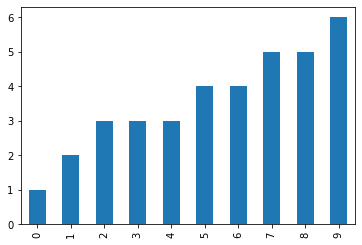

In [4]:
# your code here

df.sort_values(by=[0]).reset_index()[0].plot(kind = 'bar')


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
pd.value_counts(df[0])

3    3
5    2
4    2
6    1
2    1
1    1
Name: 0, dtype: int64

(array([1., 0., 1., 0., 3., 0., 2., 0., 2., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

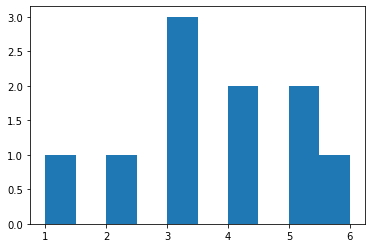

In [6]:
# your code here
plt.hist(df[0])

In [7]:
"""
your comments here

in first graphic we see all the results one by one. in the second we see the same result grupped by the mode 


"""

'\nyour comments here\n\nin first graphic we see all the results one by one. in the second we see the same result grupped by the mode \n\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

def mean(x):
    return sum(x) / len(x)
df

,0
0,3
1,3
2,5
3,1
4,4
5,5
6,4
7,6
8,2
9,3


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

(array([1., 0., 1., 0., 3., 0., 2., 0., 2., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

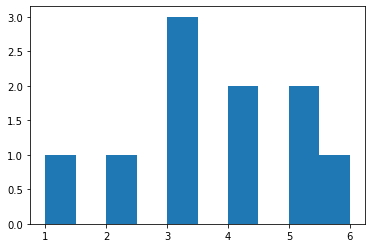

In [9]:
# your code here

plt.hist(df[0])


In [10]:
mean(df[0])

3.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
# your code here
def median(lst):
    sortedLst = sorted(list(lst))
    lstLen = len(lst)

    if (lstLen % 2) == 0:
        index1 = int(lstLen / 2)
        index2 = int((lstLen / 2) - 1)
        return (sortedLst[index1] + sortedLst[index2]) / 2, [index1, index2]
    else:
        index1 = int(lstLen / 2)
        return sortedLst[index1], [index1]


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
samples = [28, 12, 8, 27, 16, 31, 14, 13, 19, 1, 1, 22, 13]

med, median_indices = median(samples)

Q2, Q1_indices = median(samples[:median_indices[0]])
Q1, Q2_indices = median(samples[median_indices[-1] + 1:])

quartiles = [Q1, med, Q2]

print("(Q1, median, Q3): {}".format(quartiles))

(Q1, median, Q3): [13.0, 14, 21.5]


In [13]:
median(samples)

(14, [6])

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
# your code here
data = pd.read_csv('roll_the_dice_hundred.csv')
data=data.sort_values(by='value')
data


,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


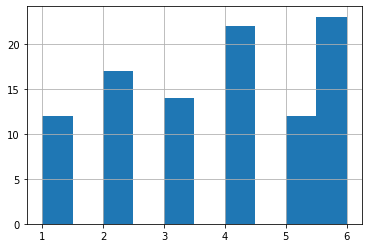

In [15]:
data['value'].hist()

In [16]:
"""
your comments here

"""

'\nyour comments here\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here

mean(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [18]:
# your code here

data['value'].value_counts()



6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

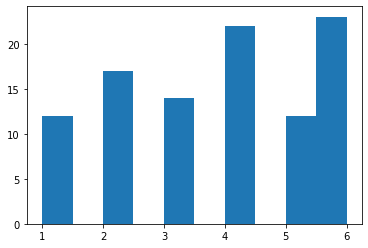

In [19]:
# your code here

plt.hist(data['value'])




In [20]:
"""
your comments here
the mean is between 3 , 4
"""

'\nyour comments here\nthe mean is between 3 , 4\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

3.447

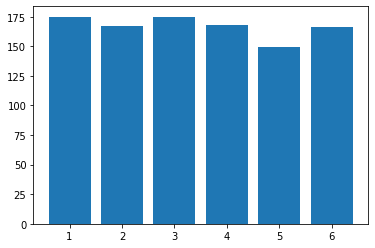

In [21]:
# your code here

data = pd.read_csv('roll_the_dice_thousand.csv')
data

data=data.sort_values(by='value')

data_hist=data.groupby('value')['value'].count()
plt.bar(data_hist.index,data_hist.values)

mean(data['value'])

In [22]:
data['value'].value_counts()

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

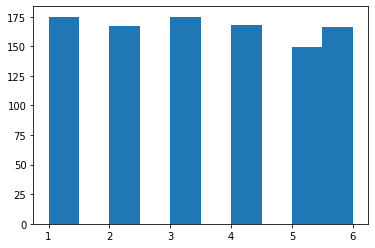

In [23]:
plt.hist(data['value'])

In [24]:
"""
your comments here

now, when we increase the number of samples, we can see the each value tend to the same distribution

"""

'\nyour comments here\n\nnow, when we increase the number of samples, we can see the each value tend to the same distribution\n\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [25]:
# your code here

data = pd.read_csv('ages_population.csv')
data

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [26]:
data['observation'].value_counts()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <a list of 10 Patch objects>)

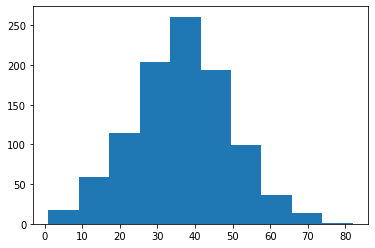

In [27]:
plt.hist(data['observation'])

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [28]:
# your code here
mean(data['observation'])

36.56

In [29]:
np.std((data['observation']))

12.81008977329979

In [30]:
"""
your comments here

almost the same 
"""

'\nyour comments here\n\nalmost the same \n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [31]:
# your code here

data2 = pd.read_csv('ages_population2.csv')
data

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [32]:
data2['observation'].value_counts()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

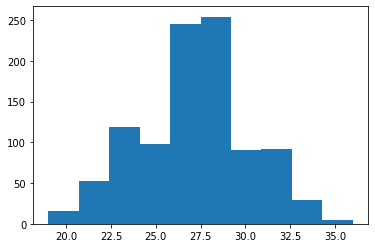

In [33]:
plt.hist(data2['observation'])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [34]:
"""
your comments here
yes, now the mean is around 28. before it was around 38
"""

'\nyour comments here\nyes, now the mean is around 28. before it was around 38\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [35]:
# your code here

data2['observation'].mean()

27.155

In [36]:
data2['observation'].std()

2.969813932689186

In [37]:
"""
your comments here
look like the data dispersion is less in this case
"""

'\nyour comments here\nlook like the data dispersion is less in this case\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [38]:
# your code here
data3 = pd.read_csv('ages_population3.csv')

data3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [39]:
data3['observation'].value_counts()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

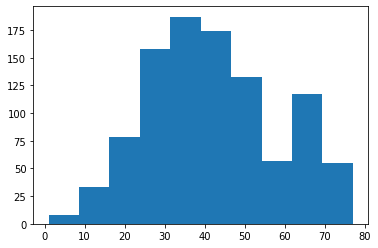

In [40]:
plt.hist([data3['observation']])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [41]:
# your code here

data3.mean()

observation    41.989
dtype: float64

In [42]:
data3.std()

observation    16.144706
dtype: float64

In [43]:
"""
your comments here
now the values are more spread out. also we can see values around 70. this will affect the mean 
"""

'\nyour comments here\nnow the values are more spread out. also we can see values around 70. this will affect the mean \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [44]:
# your code here

data3.quantile()


q1=data3.quantile(q=0.25)
median=data3.quantile(q=0.5)
q3=data3.quantile(q=0.75)
mean=data3.mean()

print(q1,median,q3,mean)

observation    30.0
Name: 0.25, dtype: float64 observation    40.0
Name: 0.5, dtype: float64 observation    53.0
Name: 0.75, dtype: float64 observation    41.989
dtype: float64


In [45]:
"""
your comments here

the difference is 13 (53-40). it shows the means has been affected 
"""

'\nyour comments here\n\nthe difference is 13 (53-40). it shows the means has been affected \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [46]:
# your code here


q9 =data3.quantile(q=0.9)

q8 = data3.quantile(q=0.8)


print( q9, q8)



observation    67.0
Name: 0.9, dtype: float64 observation    57.0
Name: 0.8, dtype: float64


In [47]:
"""
your comments here
about 10% of people are 67 
"""

'\nyour comments here\nabout 10% of people are 67 \n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [48]:
# your code here

In [49]:
"""
your comments here
"""

'\nyour comments here\n'